In [328]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [329]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters


,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
1,resultsFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,uniqueFilenameString,488nm_0
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackColor,green
9,trackingBildFilename,tracks.bild


In [330]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [419]:
resultsFolder = getInputParameter(inputParameters,"resultsFolder")
trackingCsvFilename = getInputParameter(inputParameters,"trackingCsvFilename")
trackColor = getInputParameter(inputParameters,"trackColor")
trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = float(getInputParameter(inputParameters,"movieLength"))
print(trackColor)

#hack
resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
trackColor = "red"

print(resultsFolder)

green
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/


In [420]:
data = pd.read_csv(resultsFolder+'/'+trackingCsvFilename,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
1,1,70,2,0,2.398080e+02,3.455938e+02,4.452885e+01,2.285881e+04,5.624323e-02,5.640477e-02,5.648089e-02,7.705259e+02
2,1,70,3,121,2.396020e+02,3.457261e+02,4.401741e+01,2.191670e+04,6.825404e-02,6.812530e-02,6.801579e-02,8.966284e+02
3,1,70,4,90,2.400139e+02,3.457024e+02,4.475419e+01,2.231589e+04,5.023574e-02,5.033191e-02,5.030067e-02,6.751585e+02
4,1,70,5,85,2.397104e+02,3.454962e+02,4.467903e+01,2.411560e+04,5.471115e-02,5.492841e-02,5.473449e-02,7.897406e+02


# number of tracks

In [421]:
print(len(data))
print('unique tracks',len(np.unique(data['trackId'].values)))

136917
unique tracks 14655


# length of tracks

In [426]:
dataUnique = data.drop_duplicates(subset='trackId')
print(len(dataUnique))

14655


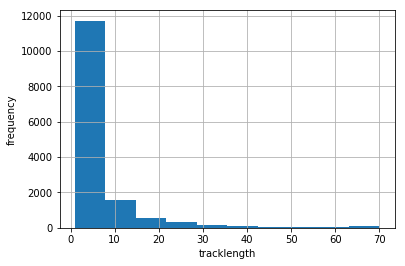

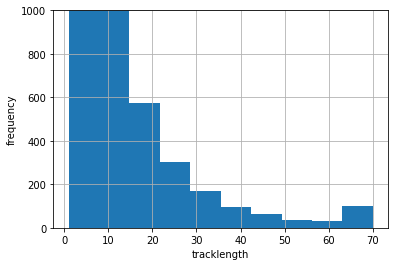

In [368]:
(data[['trackId','tracklength']].drop_duplicates())['tracklength'].hist()
plt.xlabel('tracklength')
plt.ylabel('frequency')
plt.show()
(data[['trackId','tracklength']].drop_duplicates())['tracklength'].hist()
plt.ylim(0,1000)
plt.xlabel('tracklength')
plt.ylabel('frequency')
plt.show()

# ----- multi track analysis

In [357]:
tracksBeingTested
dataUnique[dataUnique['tracklength']==70]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,123,2.401194e+02,3.449448e+02,4.499062e+01,1.935832e+04,7.636581e-02,7.634770e-02,7.634294e-02,8.918059e+02
140,2,70,1,159,3.062860e+02,4.630198e+02,4.575941e+01,1.310848e+04,5.990659e-02,5.980137e-02,5.987510e-02,4.721713e+02
210,3,70,1,180,2.470761e+02,3.588959e+02,4.720711e+01,2.336532e+04,5.820021e-02,5.820641e-02,5.824640e-02,8.199829e+02
490,4,70,1,908,1.984057e+02,2.623954e+02,7.799306e+01,1.245831e+04,7.838746e-02,7.837243e-02,7.810247e-02,5.845062e+02
1050,5,70,1,1169,2.221765e+02,1.983957e+02,8.844901e+01,2.182379e+04,4.848016e-02,4.886520e-02,4.866684e-02,6.325202e+02
1120,6,70,1,1138,2.078321e+02,1.492517e+02,8.642120e+01,2.015238e+04,7.550022e-02,7.555757e-02,7.604654e-02,9.119736e+02
1190,7,70,1,1273,2.379746e+02,1.841283e+02,9.116802e+01,1.154600e+04,5.502499e-02,5.504341e-02,5.505725e-02,3.832120e+02
1330,8,70,1,1383,1.567659e+02,3.042922e+02,9.472442e+01,1.443803e+04,6.586060e-02,6.502849e-02,6.574556e-02,5.556748e+02
1400,9,70,1,1268,2.214703e+02,2.779795e+02,9.138771e+01,3.962430e+04,4.219905e-02,4.192890e-02,4.206747e-02,9.963586e+02
1610,10,70,1,1499,1.328587e+02,1.885888e+02,9.816280e+01,8.042975e+03,8.365179e-02,8.393092e-02,8.366347e-02,4.046278e+02


In [369]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
print('accumulatorLenght',accumulatorLenght)

accumulator = [[] for _ in range(accumulatorLenght)]
mean = [0] * accumulatorLenght
stddev = [0] * accumulatorLenght

alignmentIndexes = []
#accumulator_dnm = [[] for _ in range(accumulatorLenght)]
#mean_dnm = [0] * accumulatorLenght
#stddev_dnm = [0] * accumulatorLenght

tracksBeingTested = dataUnique['trackId']#.values[0:20]
N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:
    
    if(iteration%1000 == 0):
            print(iteration)

    track = data[data['trackId'] == trackID]
    
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    amplitudesArray = track['A'].astype(float).values
    #print(amplitudesArray)
    amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
    
    
    maxAmplitude_idx = amplitudesArray_filtered.argmax()

    maxTime = time_inSeconds[maxAmplitude_idx]
    maxAmplitude = amplitudesArray[maxAmplitude_idx]

    

    

    # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
    #plt.plot(time_inSeconds,amplitudesArray)
    #plt.plot(time_inSeconds,amplitudesArray_filtered)
    #plt.show()

    
    alignmentIndexes.append(maxAmplitude_idx)
    
    for j in range(0,tracklength-1):
        
        time = time_inSeconds[j]
        #amplitude = amplitudesArray[j]
        amplitude = amplitudesArray_filtered[j]
        

        #SWITCH HERE
        #alignmentIndex = newZeroIndex-maxAmplitude_idx+j
        alignmentIndex = newZeroIndex+j
        
        accumulator[alignmentIndex].append(amplitude)
        
 

    iteration = iteration+1     
            
# weighting:
for i in range(0,len(accumulator)):
    mean[i] = np.nanmean(accumulator[i])
    stddev[i] = np.nanstd(accumulator[i])


    


accumulatorLenght 140
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


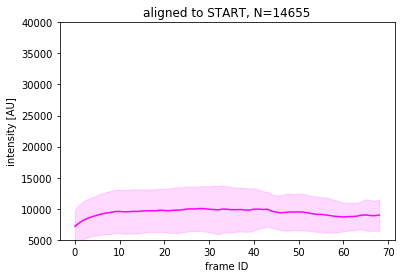

In [370]:
color = 'green'
time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
#plt.plot(mean,c='green')
plt.plot(time_inSeconds,mean,c=color)
plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.xlabel('time[s]')
plt.xlabel('frame ID')
plt.ylabel('intensity [AU]')

#plt.xlim(min(time_inSeconds),max(time_inSeconds))
plt.ylim(5000,40000)
plt.title('aligned to START, N='+str(N))
#plt.title('aligned to MOVIE START, N='+str(N))

plt.show()

In [ ]:
# test the average for every track length

In [ ]:
uniqueLengths = data['tracklength'].drop_duplicates().values
uniqueLengths

accumulatorLenght 140
0


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


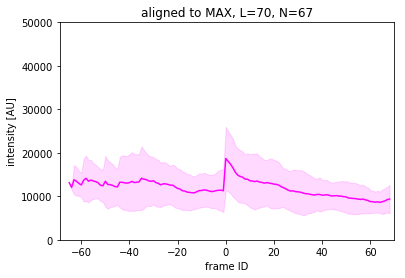

0


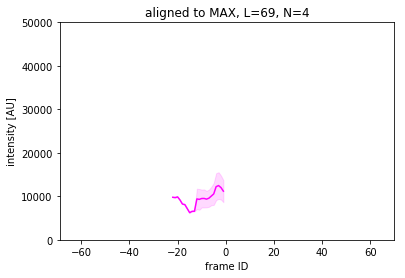

0


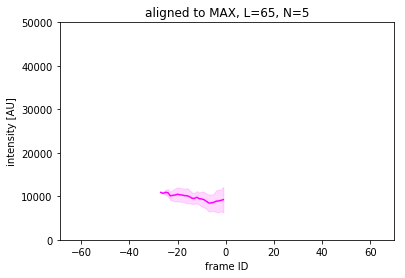

0


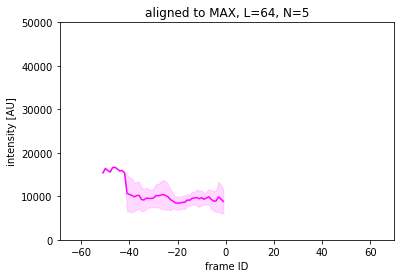

0


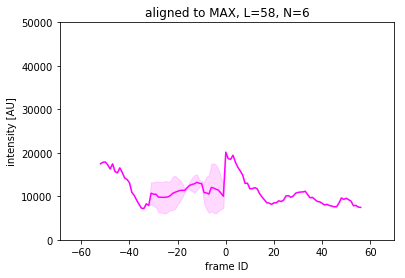

0


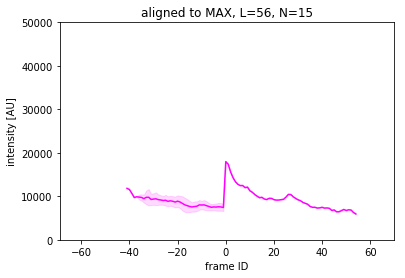

0


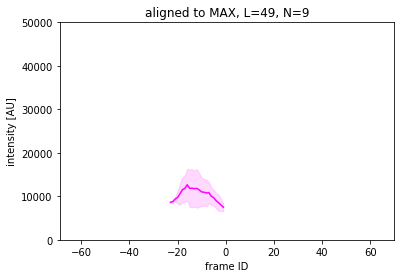

0


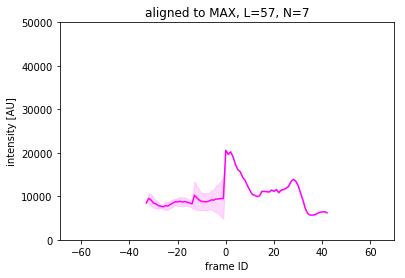

0


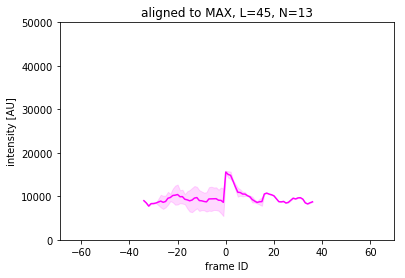

0


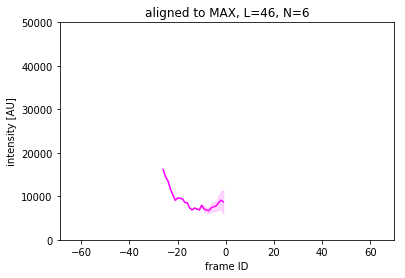

0


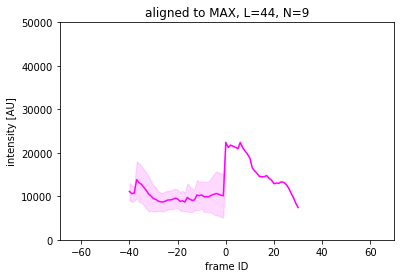

0


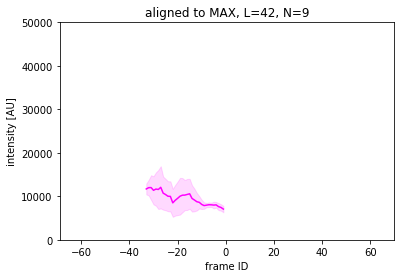

0


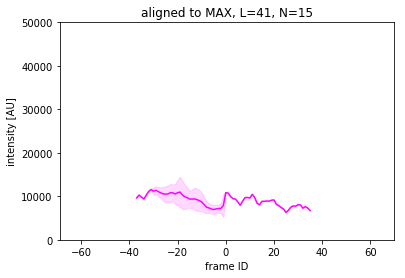

0


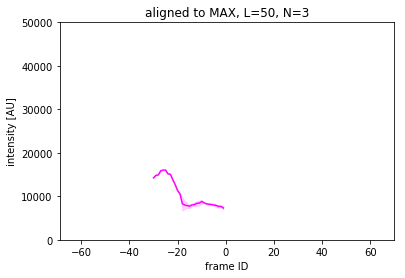

0


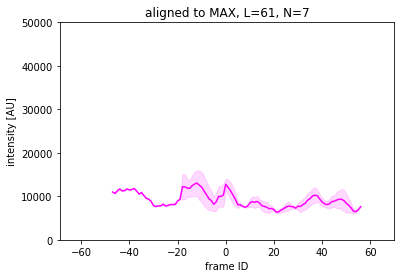

0


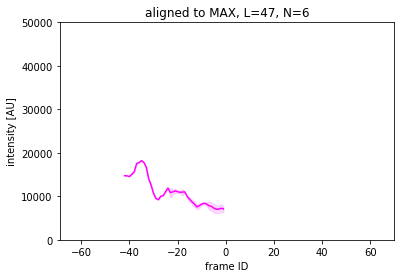

0


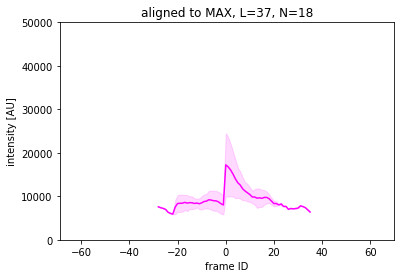

0


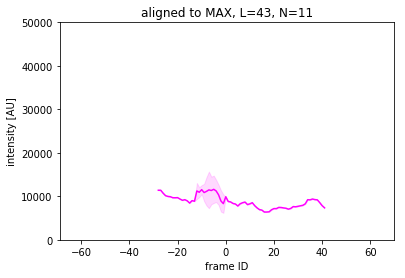

0


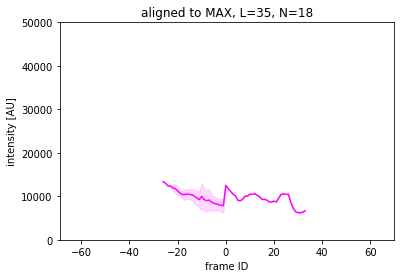

0


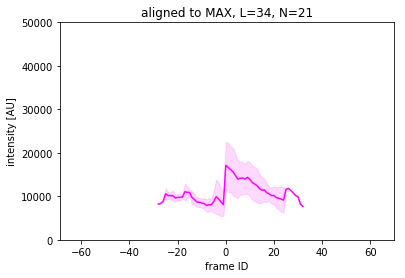

0


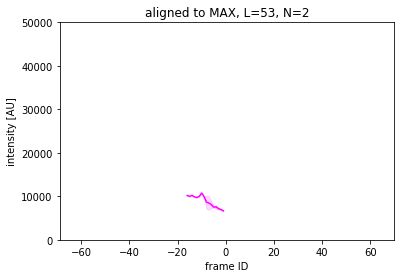

0


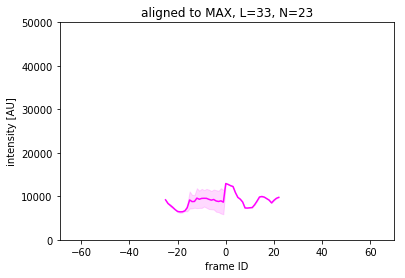

0


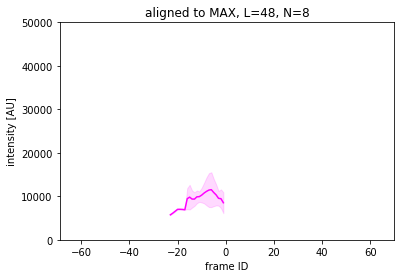

0


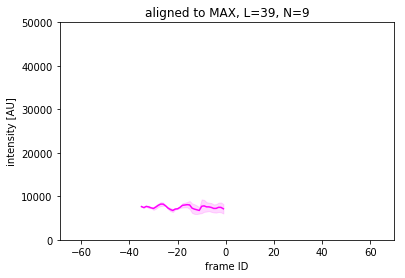

0


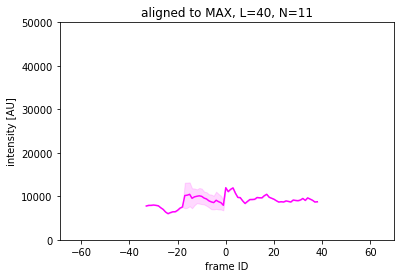

0


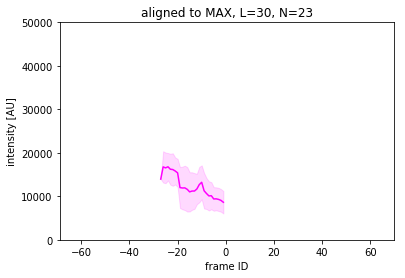

0


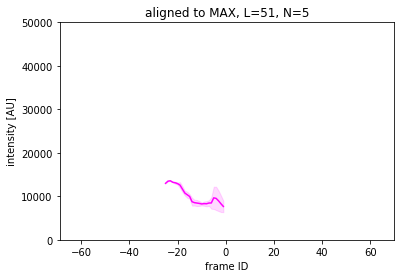

0


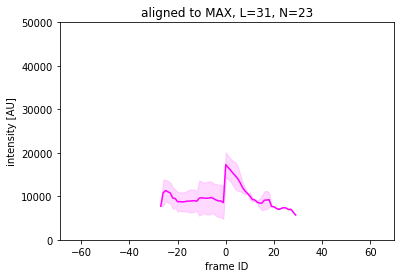

0


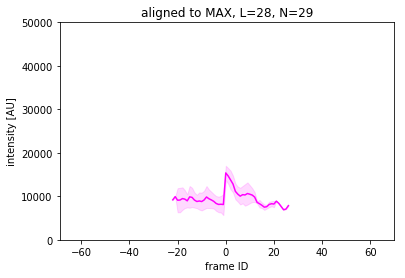

0


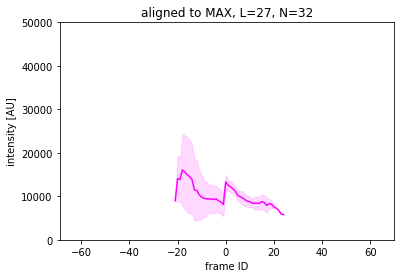

0


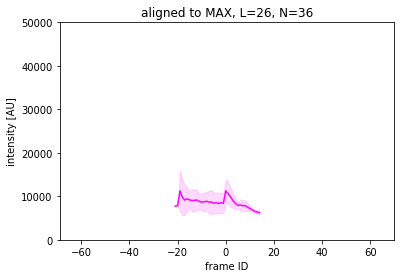

0


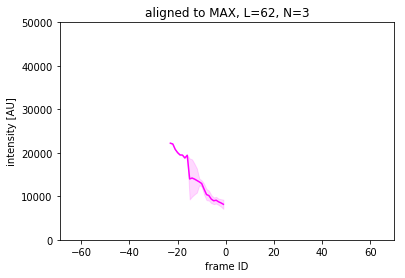

0


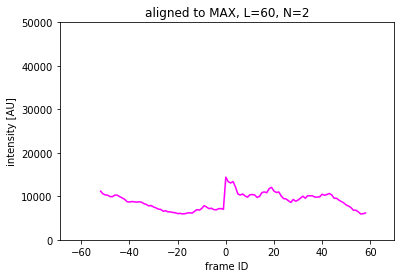

0


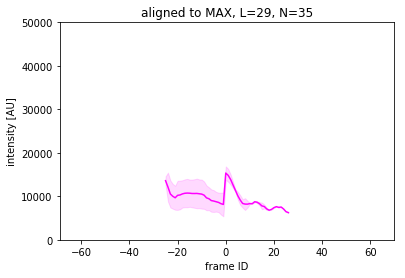

0


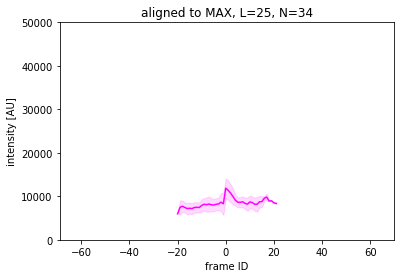

0


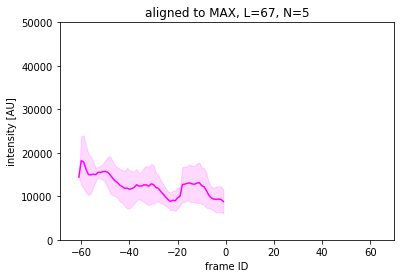

0


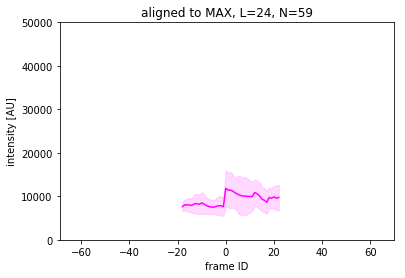

0


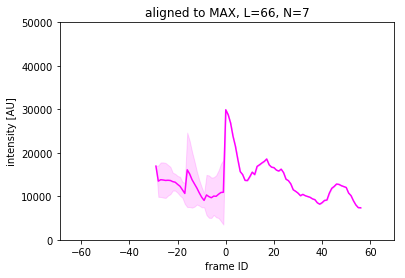

0


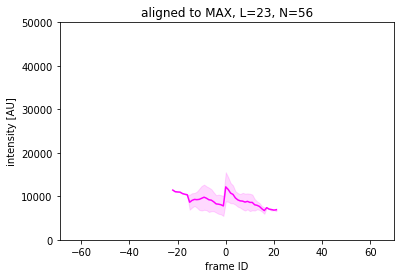

0


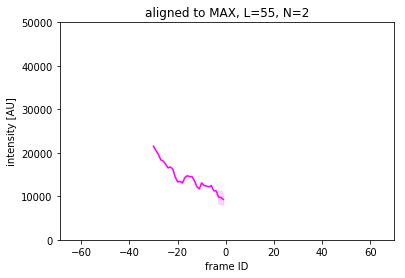

0


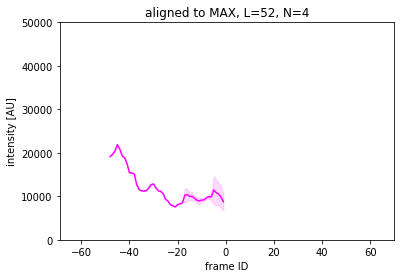

0


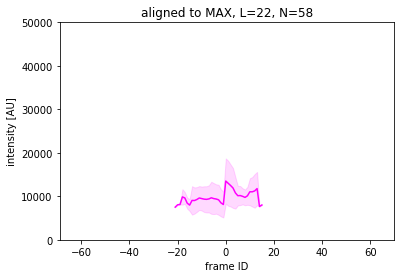

0


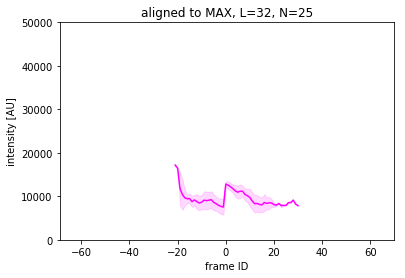

0


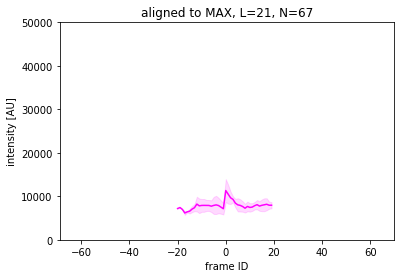

0


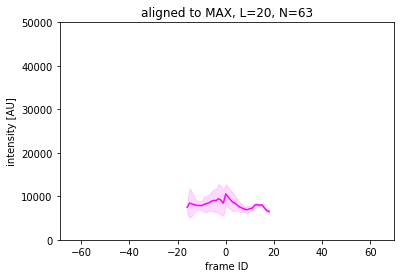

0


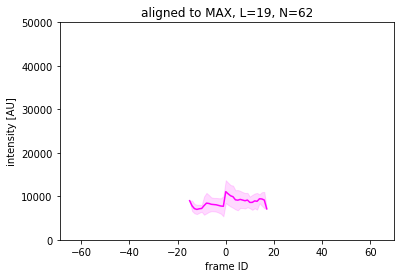

0


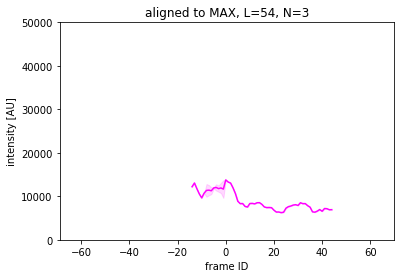

0


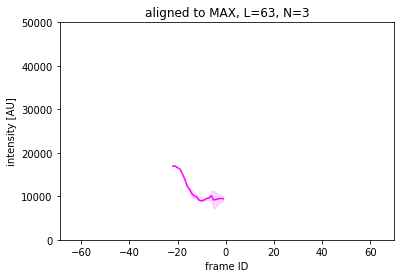

0


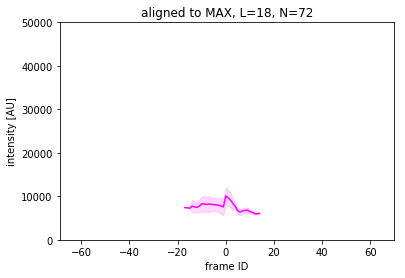

0


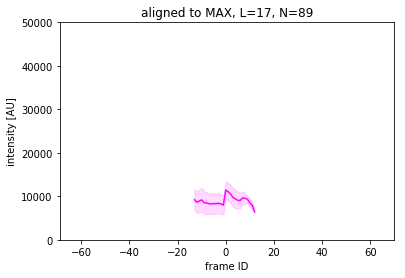

0


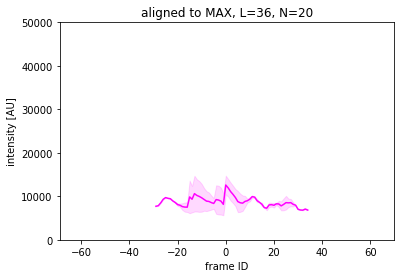

0


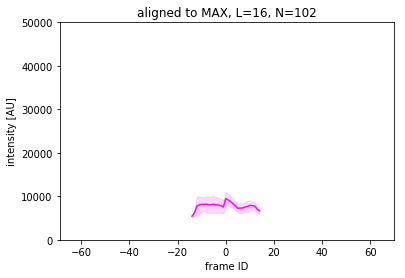

0


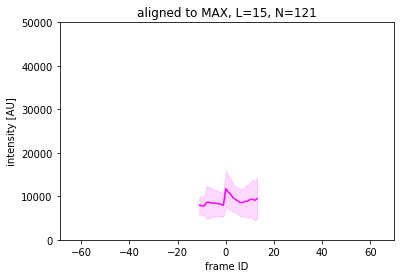

0


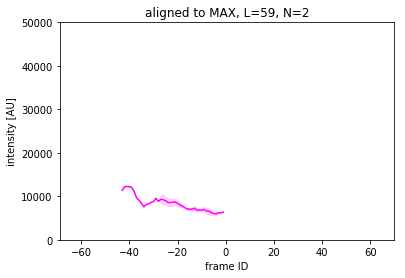

0


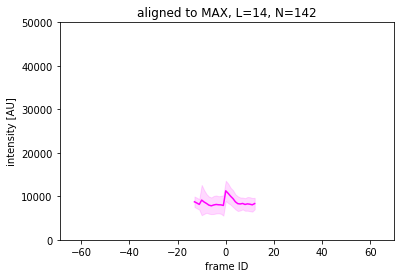

0


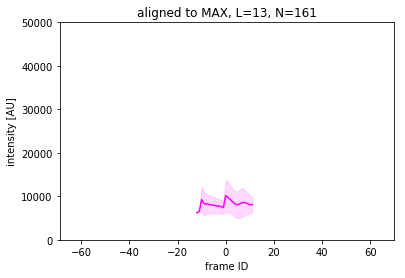

0


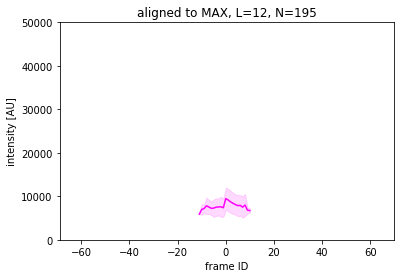

0


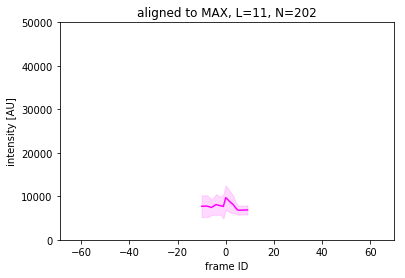

0


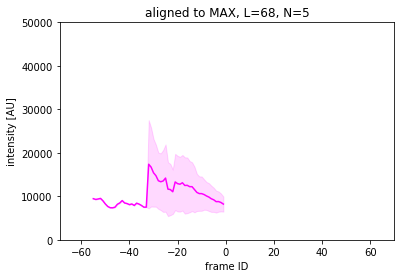

0


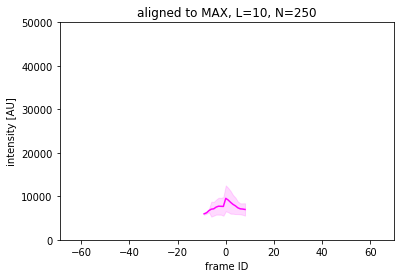

0


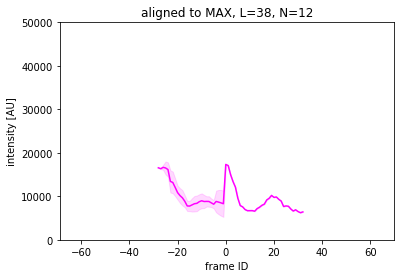

0


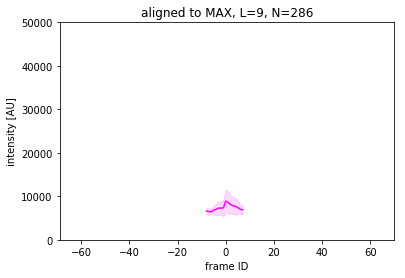

0


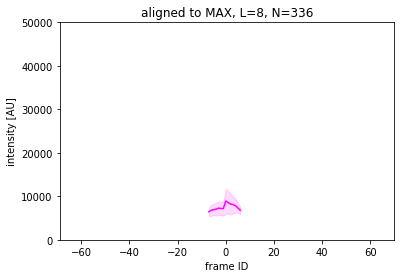

0


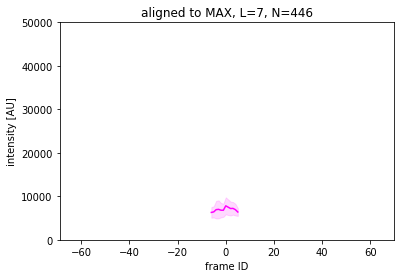

0


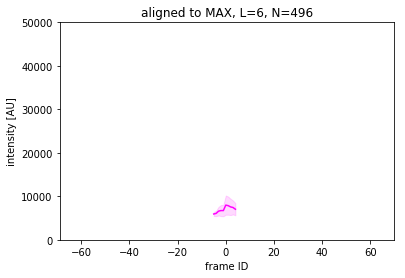

0


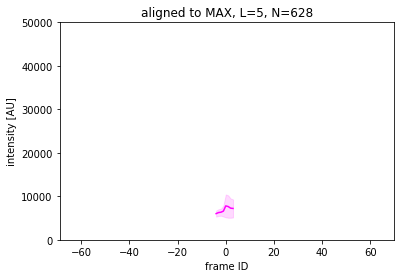

0


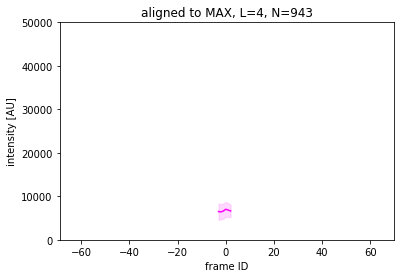

0
1000


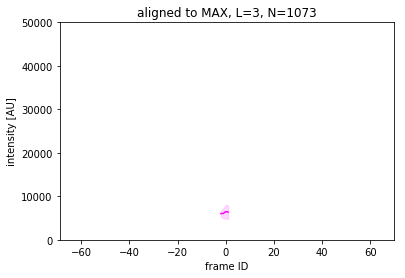

0
1000


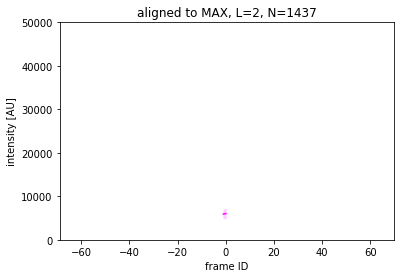

0
1000
2000
3000
4000
5000
6000


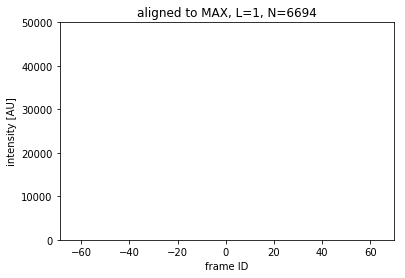

In [347]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
print('accumulatorLenght',accumulatorLenght)



for trackLength in uniqueLengths:
    trackLengthSelectedTracks =  dataUnique[dataUnique['tracklength']==trackLength]
    tracksBeingTested = trackLengthSelectedTracks['trackId'].values#[0:5000]
    N = len(tracksBeingTested)
    iteration = 0
    
    accumulator = [[] for _ in range(accumulatorLenght)]
    mean = [0] * accumulatorLenght
    stddev = [0] * accumulatorLenght
    
    alignmentIndexes = []
    #accumulator_dnm = [[] for _ in range(accumulatorLenght)]
    #mean_dnm = [0] * accumulatorLenght
    #stddev_dnm = [0] * accumulatorLenght
    
    for trackID in tracksBeingTested:
        
        if(iteration%1000 == 0):
                print(iteration)
    
        track = data[data['trackId'] == trackID]
        
        tracklength = (track['tracklength'].values)[0]
        track = track[0:tracklength]
        
        time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
        
        amplitudesArray = track['A'].astype(float).values
        #print(amplitudesArray)
        amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
        
        
        maxAmplitude_idx = amplitudesArray_filtered.argmax()
    
        maxTime = time_inSeconds[maxAmplitude_idx]
        maxAmplitude = amplitudesArray[maxAmplitude_idx]
    
        
    
        
    
        # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
        #plt.plot(time_inSeconds,amplitudesArray)
        #plt.plot(time_inSeconds,amplitudesArray_filtered)
        #plt.show()
    
        
        alignmentIndexes.append(maxAmplitude_idx)
        
        for j in range(0,tracklength-1):
            
            time = time_inSeconds[j]
            #amplitude = amplitudesArray[j]
            amplitude = amplitudesArray_filtered[j]
    
            #SWITCH HERE
            alignmentIndex = newZeroIndex-maxAmplitude_idx+j
            #alignmentIndex = newZeroIndex+j
            
            accumulator[alignmentIndex].append(amplitude)
            
     
    
        iteration = iteration+1     
            
    # weighting:
    for i in range(0,len(accumulator)):
        mean[i] = np.nanmean(accumulator[i])
        stddev[i] = np.nanstd(accumulator[i])
    
    
        
    time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
    #plt.plot(mean,c='green')
    plt.plot(time_inSeconds,mean,c='magenta')
    plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
    #plt.xlabel('time[s]')
    plt.xlabel('frame ID')
    plt.ylabel('intensity [AU]')
    
    plt.xlim(min(time_inSeconds),max(time_inSeconds))
    #plt.xlim(0,70)
    plt.ylim(0,50000)
    plt.title('aligned to MAX, L='+str(trackLength)+', N='+str(N))
    #plt.title('aligned to MOVIE START, N='+str(N))
    plt.savefig('488_L'+str(trackLength)+'.png')
    plt.show()


In [ ]:
normalization_chc = np.nanmean(ndimage.median_filter(mean_chc,30)[70:130])
normalization_dnm = np.nanmean(ndimage.median_filter(mean_dnm,30)[70:130])    
    

fig = plt.figure(figsize=(4,6),dpi=300)
plt.title("")
#mean_chc = ndimage.median_filter(mean_chc,3)
#stddev_chc = ndimage.median_filter(stddev_chc,3)

#plt.plot(mean_chc/np.nanmax(mean_chc),c="magenta")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_chc/np.max(mean_chc))-np.array(stddev_chc/np.max(mean_chc)), np.array(mean_chc/np.max(mean_chc))+np.array(stddev_chc/np.max(mean_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.plot(mean_dnm/np.nanmax(mean_dnm),c="lime")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_dnm/np.max(mean_dnm))-np.array(stddev_dnm/np.max(mean_dnm)), np.array(mean_dnm/np.max(mean_dnm))+np.array(stddev_dnm/np.max(mean_dnm)), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'


mean_chc = mean_chc/normalization_chc
stddev_chc = stddev_chc/normalization_chc
mean_dnm = mean_dnm/normalization_dnm
stddev_dnm = stddev_dnm/normalization_dnm

frameToTime = 3 #3s/frame
time = frameToTime*np.array(range(0,accumulatorLenght))-frameToTime*(accumulatorLenght/2)

line_chc = plt.plot(time,mean_chc,c="magenta",lw=3)
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime",lw=3)
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
plt.xlim(frameToTime*-20,frameToTime*20)
plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()



#plt.legend((lo, ll, l, a, h, hh, ho),
#           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)

fig = plt.figure(dpi=300)
line_chc = plt.plot(time,mean_chc,c="magenta")
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime")
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
#plt.xlim(frameToTime*-20,frameToTime*20)
#plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()

# --------- single Track Analysis

# distances within a track

In [374]:
trackID = 1
track = data[data['trackId'] == trackID]
#print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

## track[0:80]

In [375]:
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)

distances = []
distToOrigin = []
origin = np.array([x[0],y[0],z[0]])
for i in range(1,70):
    a = np.array([x[i-1],y[i-1],z[i-1]])
    b = np.array([x[i],y[i],z[i]])
    dist = np.linalg.norm(a-b)
    dist2ori = np.linalg.norm(origin-a)
    distances.append(dist)
    distToOrigin.append(dist2ori)

In [376]:
len(time_inSeconds)

70

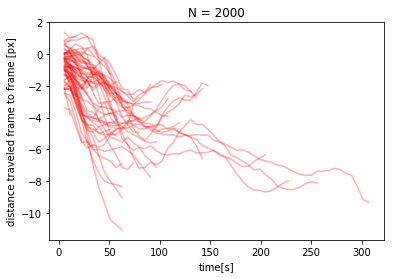

In [427]:


uniqueLongTracks = dataUnique[dataUnique['tracklength'] > 10]
tracksBeingTested = uniqueLongTracks['trackId'].values[0:2000]

N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:

    track = data[data['trackId'] == trackID]
    #print((track['tracklength'].values)[0])
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    
    if np.abs(z[0]-z[10]>3):
    
#    plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(x-x[0],size =5),c='k')
#    plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(y-y[0],size =5),c='b')
        plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(z-z[0],size =5),c='r',alpha=0.3)
        plt.xlabel('time[s]')
        plt.ylabel('distance traveled frame to frame [px]')
        plt.title('N = '+str(N))


accumulatorLenght 140
0
1000


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


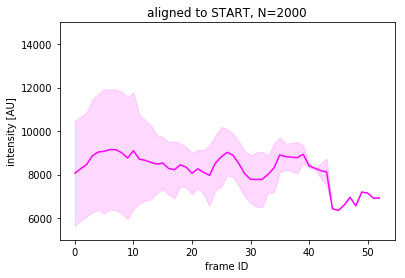

In [431]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
print('accumulatorLenght',accumulatorLenght)

accumulator = [[] for _ in range(accumulatorLenght)]
mean = [0] * accumulatorLenght
stddev = [0] * accumulatorLenght

alignmentIndexes = []
#accumulator_dnm = [[] for _ in range(accumulatorLenght)]
#mean_dnm = [0] * accumulatorLenght
#stddev_dnm = [0] * accumulatorLenght



uniqueLongTracks = dataUnique[dataUnique['tracklength'] > 10]
tracksBeingTested = uniqueLongTracks['trackId'].values[0:2000]
N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:
    
    if(iteration%1000 == 0):
            print(iteration)

    track = data[data['trackId'] == trackID]
    
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    
    
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    
    if np.abs(z[0]-z[10]>3):
    
        time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
        
        amplitudesArray = track['A'].astype(float).values
        #print(amplitudesArray)
        amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
        
        
        maxAmplitude_idx = amplitudesArray_filtered.argmax()
    
        maxTime = time_inSeconds[maxAmplitude_idx]
        maxAmplitude = amplitudesArray[maxAmplitude_idx]
    
        
    
        
    
        # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
        #plt.plot(time_inSeconds,amplitudesArray)
        #plt.plot(time_inSeconds,amplitudesArray_filtered)
        #plt.show()
    
        
        alignmentIndexes.append(maxAmplitude_idx)
        
        for j in range(0,tracklength-1):
            
            time = time_inSeconds[j]
            #amplitude = amplitudesArray[j]
            amplitude = amplitudesArray_filtered[j]
            
    
            #SWITCH HERE
            #alignmentIndex = newZeroIndex-maxAmplitude_idx+j
            alignmentIndex = newZeroIndex+j
            
            accumulator[alignmentIndex].append(amplitude)
        
 

    iteration = iteration+1     
            
# weighting:
for i in range(0,len(accumulator)):
    mean[i] = np.nanmean(accumulator[i])
    stddev[i] = np.nanstd(accumulator[i])


    

color = 'magenta'
time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
#plt.plot(mean,c='green')
plt.plot(time_inSeconds,mean,c=color)
plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.xlabel('time[s]')
plt.xlabel('frame ID')
plt.ylabel('intensity [AU]')

#plt.xlim(min(time_inSeconds),max(time_inSeconds))
plt.ylim(5000,15000)
plt.title('aligned to START, N='+str(N))
#plt.title('aligned to MOVIE START, N='+str(N))

plt.show()

(0, 20000)

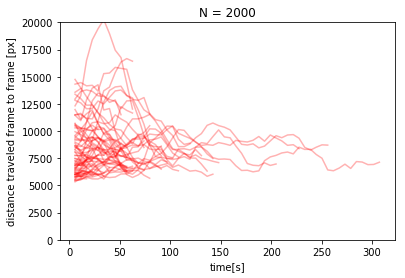

In [433]:


uniqueLongTracks = dataUnique[dataUnique['tracklength'] > 10]
tracksBeingTested = uniqueLongTracks['trackId'].values[0:2000]

N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:

    track = data[data['trackId'] == trackID]
    #print((track['tracklength'].values)[0])
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    a = track['A'].values.astype(float)
    
    if np.abs(z[0]-z[10]>3):
    
#    plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(x-x[0],size =5),c='k')
#    plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(y-y[0],size =5),c='b')
        plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(a,size =5),c='r',alpha=0.3)
        plt.xlabel('time[s]')
        plt.ylabel('distance traveled frame to frame [px]')
        plt.title('N = '+str(N))


plt.ylim(0,20000)

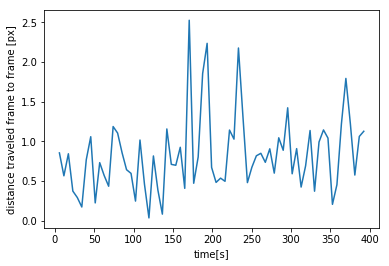

In [340]:
plt.plot(time_inSeconds[0:-1],distances)
plt.xlabel('time[s]')
plt.ylabel('distance traveled frame to frame [px]')
plt.show()

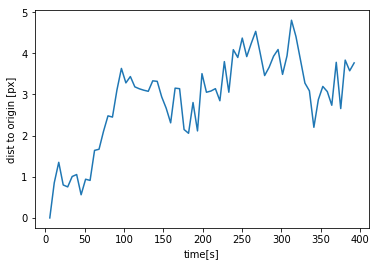

In [341]:
plt.plot(time_inSeconds[0:-1],distToOrigin)
plt.xlabel('time[s]')
plt.ylabel('dist to origin [px]')
plt.show()

# Amplitude

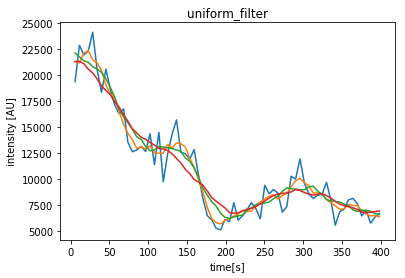

In [342]:
plt.plot(time_inSeconds,track['A'].astype('float').values)
plt.xlabel('time[s]')
plt.ylabel('intensity [AU]')
plt.title('uniform_filter')


import scipy.ndimage
filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =5)
plt.plot(time_inSeconds,filtered)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =10)
plt.plot(time_inSeconds,filtered)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =15)
plt.plot(time_inSeconds,filtered)



plt.show()

# 3D path

In [343]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


cmap_green = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'darkgreen'),
                                                          (0.5, 'lime'),
                                                    (1.0, 'aquamarine')]
                                        )

cmap_magenta = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'purple'),
                                                          (0.5, 'magenta'),
                                                    (1.0, 'pink')]
                                        )


cmap_red = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'maroon'),
                                                          (0.5, 'red'),
                                                    (1.0, 'orange')]
                                        )

Text(0.5,0,'y [px]')

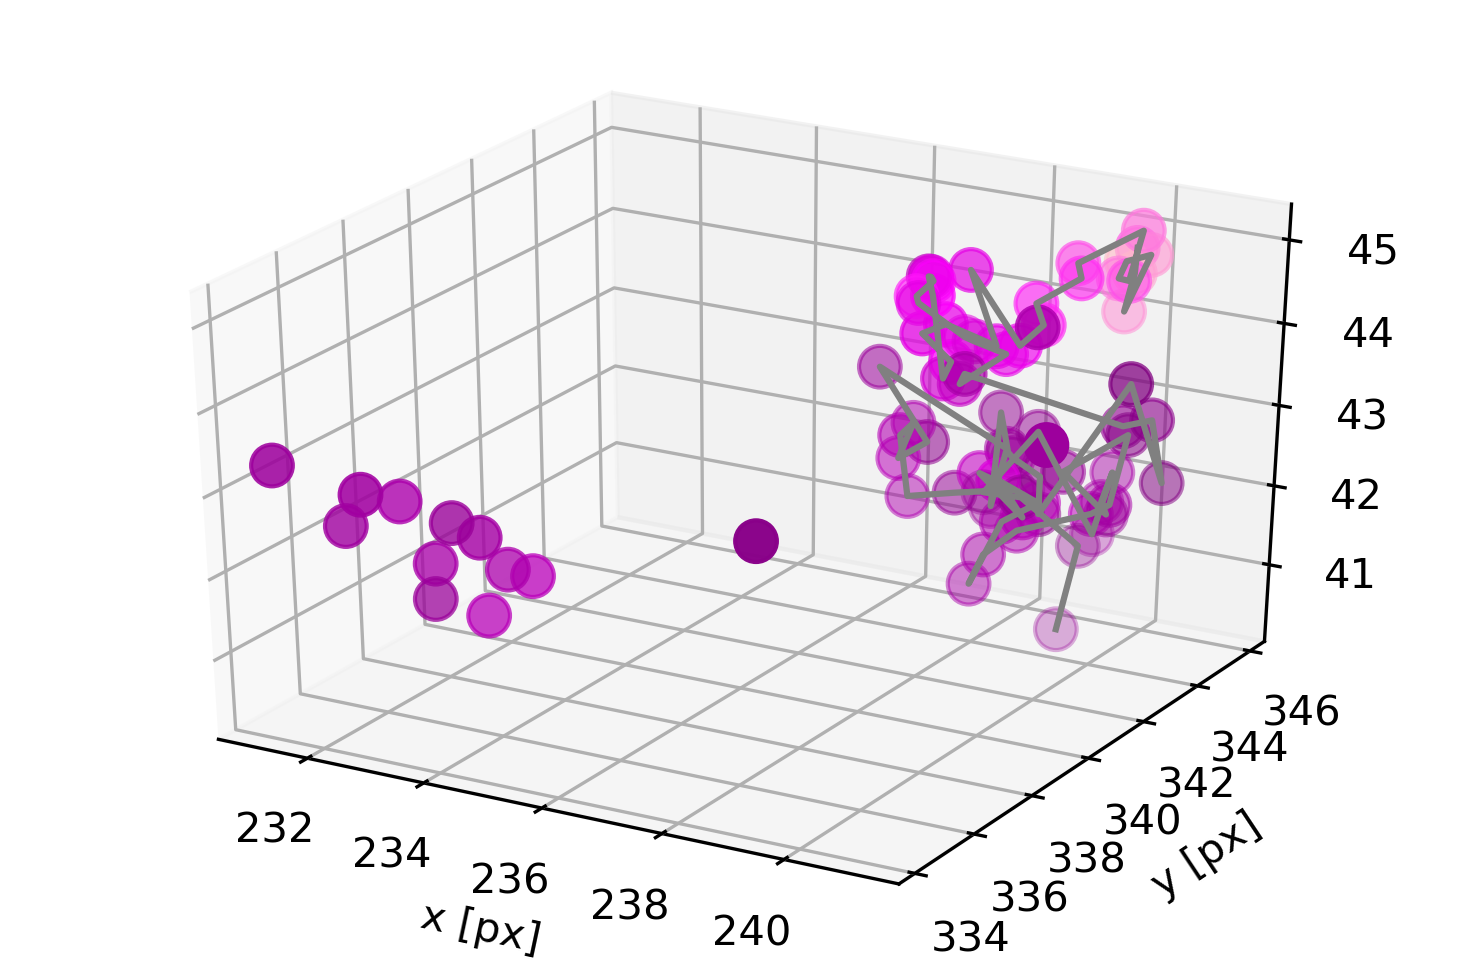

In [344]:
track = data[data['trackId'] == trackID]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'grey')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)



# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap=cmap_magenta,s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.zlabel('z [px]')

In [161]:
#plot them all
import math

data = longtracks

filename=trackingBildFilename
file = open(resultsFolder+filename,'w') 

file.write(".transparency 0.5\n")
file.write(".color "+trackColor+"\n")

for trackID in np.unique(data['trackId'].values):
    
    line = ".comment trackID"+str(trackID)+"\n"
    file.write(line)
    
    
    track = data[data['trackId'] == trackID]
    tracklength = track['tracklength'].iloc[0]
    
    for i in range(1,tracklength):
        tzero = track.iloc[i-1]
        tone = track.iloc[i]
        

        # Data for a three-dimensional line
        x0 = float(tzero['x'])
        y0 = float(tzero['y'])
        z0 = float(tzero['z'])
        A0 = float(tzero['A'])
        
        x1 = float(tone['x'])
        y1 = float(tone['y'])
        z1 = float(tone['z'])
        A1 = float(tone['A'])
        
        if(math.isnan(x0) or math.isnan(y0) or math.isnan(z0) or math.isnan(x1) or math.isnan(y1) or math.isnan(z1)):
            line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
            print(line)
            continue
        
        
        #.arrow x1 y1 z1 x2 y2 z2 [r1 [r2 [rho]]] 
        
        line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
        file.write(line)
        
file.close()

NameError: name 'longtracks' is not defined

## Do regular plotting

In [38]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 281.0502,  279.5862,  279.7567,  279.862 ,  278.4256,  279.7624,
        280.8495,  281.8301,  279.8926,  279.3148,  279.1114,  280.9626,
        279.7341,  279.7539,  280.4895,  279.5627,  279.8381,  279.5187,
        279.9367,  278.749 ,  279.0526,  279.986 ,  278.0156,  279.1678,
        279.6244,  279.0201,  277.4998,  279.1733,  277.2906,  280.7027,
        282.6612,  281.0259,  280.2437,  281.113 ,  279.7364,  280.6819,
        279.3414,  279.9951,  277.9606,  278.9522,  278.4083,  280.3117,
        278.0776,  279.4636,  278.1899,  278.7619,  278.9977,  280.2314,
        280.6199,  280.8312,  282.5022,  281.646 ,  281.873 ,  280.9223,
        280.6158,  280.2917,  280.0819,  279.3467,  279.8351,  280.5028,
        279.815 ,  280.0031,  279.4568,  279.431 ,  278.4615,  276.5531,
        277.2064,  277.7364,  277.8895,  278.9425])

Text(0,0.5,'amplitude')

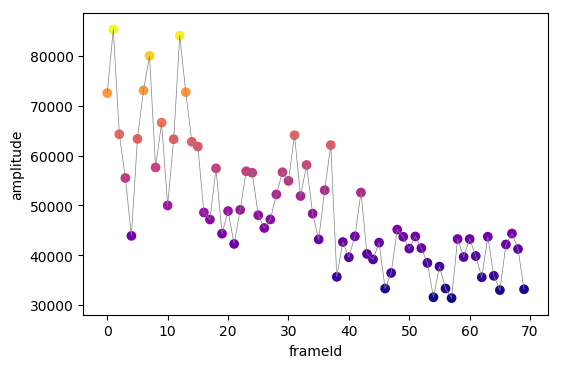

In [39]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


In [41]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

In [371]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);

NameError: name 'longtracks' is not defined